In [ ]:
# In case your notebook server doesn't run in your home folder.
import os
# os.chdir("/home/petrbel/ubuntu-ranking-dataset-creator/statistics")

Author: Petr Belohlavek ported to Python3 by Mourad

Copyright: IBM 2016 --> 2025

You can run the shell script generate.sh directly inside the Jupyter notebook 

In [7]:
!bash src/generate.sh

[nltk_data] Downloading package punkt to /home/mourad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mourad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
12400

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
from scipy.stats import chisquare, ttest_ind
from utils import *

In [9]:
# replace with appropriate paths
train_n_uterrances = n_utterances_counts('train.csv', '__eou__')
test_n_uterrances = n_utterances_counts('test.csv', '__eou__')
valid_n_uterrances = n_utterances_counts('valid.csv', '__eou__')

Compute max. number of utterances within a single context.

In [10]:
max_utt = max(max(train_n_uterrances), max(test_n_uterrances), max(valid_n_uterrances)) + 1
max_utt

163

Compute the *training* counts of the utterance numbers and their distribution

In [11]:
train_counts, train_distr = distribution(train_n_uterrances, max_utt=max_utt)
real_test_counts, test_distr = distribution(test_n_uterrances, max_utt=max_utt)
real_valid_counts, valid_distr = distribution(valid_n_uterrances, max_utt=max_utt)

In [12]:
min(train_n_uterrances)

2

In [13]:
max(train_n_uterrances)

162

In [14]:
numpy.mean(train_n_uterrances)

np.float64(6.224113)

In [15]:
numpy.std(train_n_uterrances)

np.float64(5.212921096969625)

In [16]:
min(test_n_uterrances)

2

In [17]:
max(test_n_uterrances)

58

In [18]:
numpy.mean(test_n_uterrances)

np.float64(6.024524312896406)

In [19]:
numpy.std(test_n_uterrances)

np.float64(4.967263980752672)

In [19]:
min(valid_n_uterrances)

2

In [20]:
max(valid_n_uterrances)

57

In [21]:
numpy.mean(valid_n_uterrances)

np.float64(5.874846625766871)

In [22]:
numpy.std(valid_n_uterrances)

np.float64(4.86818909434257)

We test whether the utterance distributions of *test* and *valid* datasets significantly differ from the *train* dataset.

In [23]:
expected_test_counts = train_distr * len(test_n_uterrances)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

np.float64(1.0)

And the same thing for *valid* dataset.

In [24]:
expected_valid_counts = train_distr * len(valid_n_uterrances)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

np.float64(0.9284676169674212)

We test whether the means of *test* and *valid* significantly differ from the mean of *train* dataset. Note that with sufficiently large amount of data we can proove any difference possible.

In [25]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=True)    # standard t-test

TtestResult(statistic=np.float64(5.221752166157901), pvalue=np.float64(1.7727274160452087e-07), df=np.float64(1018918.0))

In [26]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=False)   # Welch's test

TtestResult(statistic=np.float64(5.470029358885712), pvalue=np.float64(4.5543376456949e-08), df=np.float64(19715.46649427855))

In [27]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=True)    # standard t-test

TtestResult(statistic=np.float64(9.291517554986777), pvalue=np.float64(1.5238857722275943e-20), df=np.float64(1019558.0))

In [28]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=False)   # Welch's test

TtestResult(statistic=np.float64(9.92307945249262), pvalue=np.float64(3.727381789084741e-23), df=np.float64(20445.942702916724))

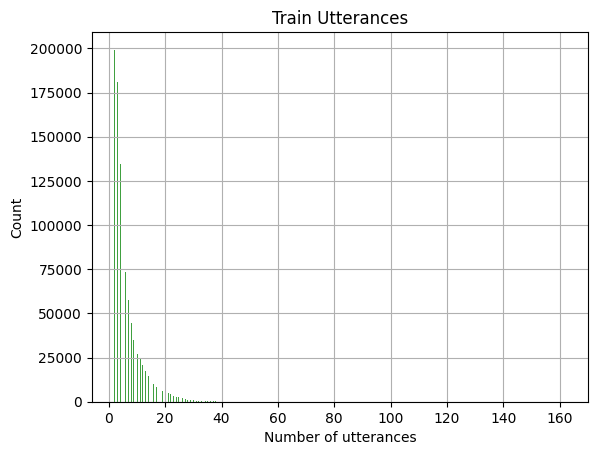

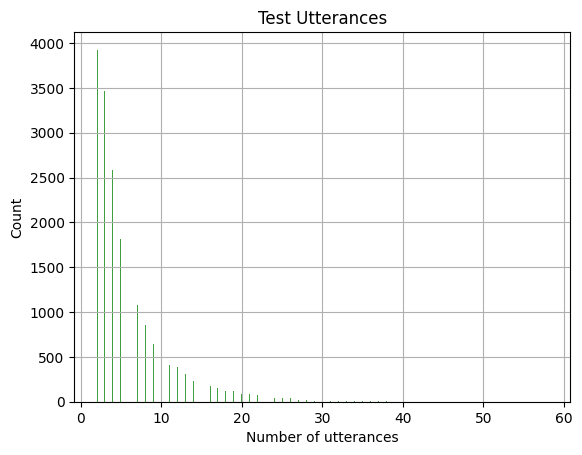

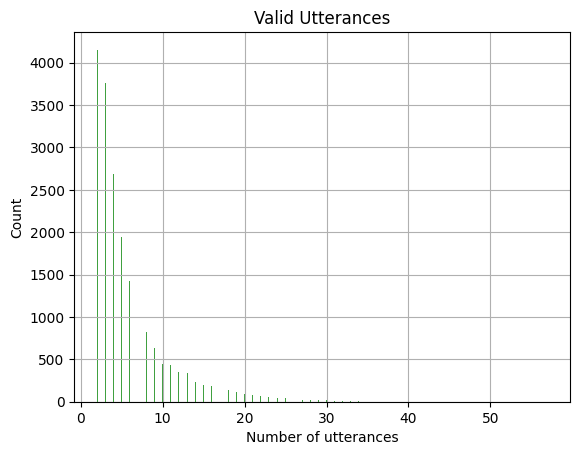

In [20]:
plot_histogram(train_n_uterrances, "Train Utterances", "Number of utterances", "Count")
plot_histogram(test_n_uterrances, "Test Utterances", "Number of utterances", "Count")
plot_histogram(valid_n_uterrances, "Valid Utterances", "Number of utterances", "Count")

In [31]:
train_n_turns = n_utterances_counts('/home/mourad/Desktop/corps/ubuntu-ranking-dataset-creator-python3-support/train.csv', '__eot__')
test_n_turns = n_utterances_counts('/home/mourad/Desktop/corps/ubuntu-ranking-dataset-creator-python3-support/test.csv', '__eot__')
valid_n_turns = n_utterances_counts('/home/mourad/Desktop/corps/ubuntu-ranking-dataset-creator-python3-support/valid.csv', '__eot__')

In [32]:
max_turns = max(max(train_n_turns), max(test_n_turns), max(valid_n_turns)) + 1
max_turns

19

In [33]:
train_counts, train_distr = distribution(train_n_turns, max_utt=max_turns)
real_test_counts, test_distr = distribution(test_n_turns, max_utt=max_turns)
real_valid_counts, valid_distr = distribution(valid_n_turns, max_utt=max_turns)

In [34]:
min(train_n_turns)

2

In [35]:
max(train_n_turns)

18

In [36]:
numpy.mean(train_n_turns)

np.float64(3.955744)

In [37]:
numpy.std(train_n_turns)

np.float64(2.97297652302604)

In [38]:
min(test_n_turns)

2

In [39]:
max(test_n_turns)

18

In [40]:
numpy.mean(test_n_turns)

np.float64(3.8424418604651165)

In [41]:
numpy.std(test_n_turns)

np.float64(2.8532215313720224)

In [42]:
min(valid_n_turns)

2

In [43]:
max(valid_n_turns)

18

In [44]:
numpy.mean(valid_n_turns)

np.float64(3.8026584867075663)

In [45]:
numpy.std(valid_n_turns)

np.float64(2.8098048254989707)

In [46]:
expected_test_counts = train_distr * len(test_n_turns)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

np.float64(0.003252627992851334)

In [47]:
expected_valid_counts = train_distr * len(valid_n_turns)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

np.float64(7.954989312471796e-11)

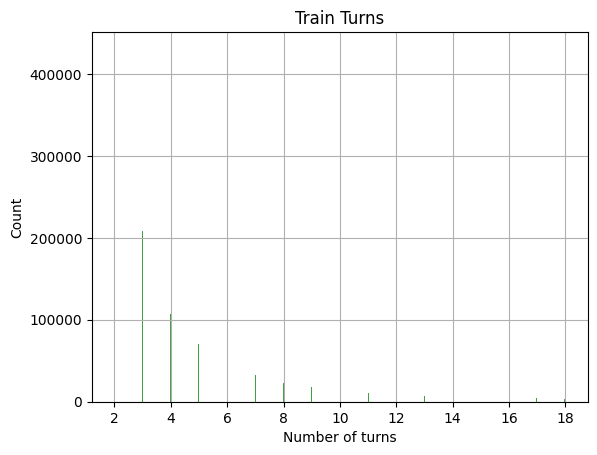

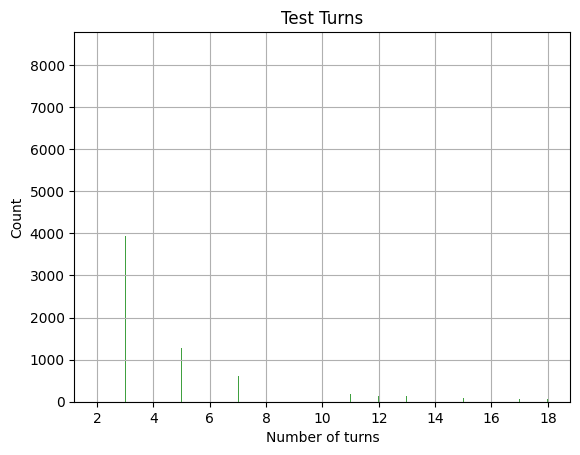

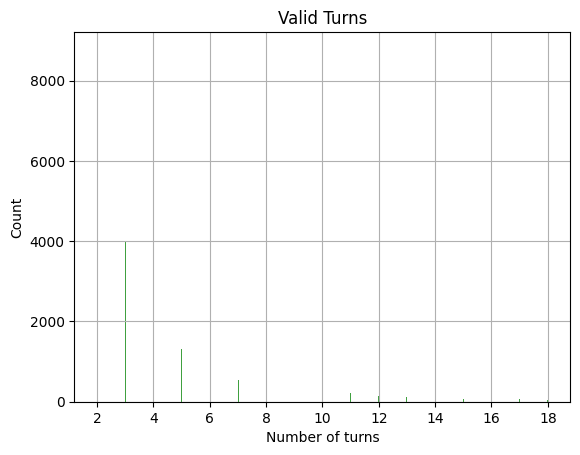

In [48]:
plot_histogram(train_n_turns, "Train Turns", "Number of turns", "Count")
plot_histogram(test_n_turns, "Test Turns", "Number of turns", "Count")
plot_histogram(valid_n_turns, "Valid Turns", "Number of turns", "Count")

In [50]:
pos_utterances, pos_turns, pos_words, neg_utterances, neg_turns, neg_words = train_stats("/home/mourad/Desktop/corps/ubuntu-ranking-dataset-creator-python3-support/train.csv")

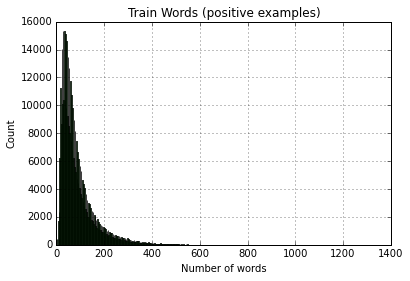

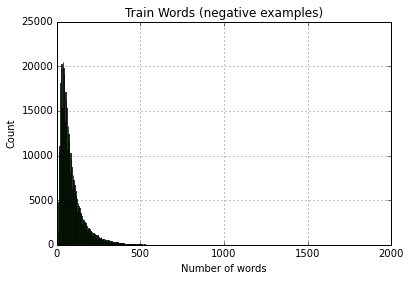

In [44]:
plot_histogram(pos_words, "Train Words (positive examples)", "Number of words", "Count")
plot_histogram(neg_words, "Train Words (negative examples)", "Number of words", "Count")

Utterances

In [51]:
ttest_ind(pos_utterances, neg_utterances)

TtestResult(statistic=np.float64(0.1578985339298908), pvalue=np.float64(0.8745367852087438), df=np.float64(999998.0))

Turns

In [52]:
ttest_ind(pos_turns, neg_turns)

TtestResult(statistic=np.float64(-0.23688571442684808), pvalue=np.float64(0.812745501369504), df=np.float64(999998.0))

Words

In [53]:
ttest_ind(pos_words, neg_words)

TtestResult(statistic=np.float64(1.1342018854886922), pvalue=np.float64(0.2567101451951464), df=np.float64(999998.0))